In [1]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings('ignore')# to ignore unwanted warnings

In [2]:
df = pd.read_csv("loan.csv") #read csv file

In [3]:
df.shape # checking rows and columns by shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info() #checking dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.columns # checking columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

1.Removing duplicate values

In [7]:
uniqueLoan = df.drop_duplicates(subset=['id'], inplace=False) #delete duplicate rows with duplicate id

In [8]:
uniqueLoan.shape

(39717, 111)

2.Identifying null valued columns and removing them

In [9]:
# Checking for null values
nullValuedColumns = df.isnull().sum()
print(nullValuedColumns.values)


[    0     0     0     0     0     0     0     0     0     0  2459  1075
     0     0     0     0     0     0     0 12940     0    11     0     0
     0     0     0     0 25682 36931     0     0     0    50     0     0
     0     0     0     0     0     0     0     0     0    71     0 38577
     2    56 39717     0     0 39717 39717 39717     0 39717 39717 39717
 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717
 39717 39717 39717 39717 39717 39717    56     0 39717 39717 39717 39717
 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717 39717
 39717 39717 39717 39717 39717 39717 39717 39717 39717   697    39 39717
 39717 39717 39717]


In [10]:
nullRatio = nullValuedColumns.values/uniqueLoan.shape[0] #finding ratio of null values
print(nullRatio)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.19130347e-02 2.70664955e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.25805071e-01
 0.00000000e+00 2.76959488e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.46624871e-01 9.29853715e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.25890677e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.78764761e-03 0.00000000e+00 9.71296926e-01
 5.03562706e-05 1.40997558e-03 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

In [11]:
# Removing columns with more than 70 percent of null values

nullDroppedLoanData = uniqueLoan.iloc[:,nullRatio <= 0.70]
print(nullDroppedLoanData.columns)
print(nullDroppedLoanData.shape)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
(39717, 55)


3. Removing Unnecesaary columns (not useful for EDA)

In [12]:
print(nullDroppedLoanData.chargeoff_within_12_mths.describe())
print(nullDroppedLoanData.acc_now_delinq.describe())
print(nullDroppedLoanData.collections_12_mths_ex_med.describe())
print(nullDroppedLoanData.delinq_amnt.describe())




count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64
count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64
count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64
count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64


In [13]:
unnecessaryColumns=["mths_since_last_delinq", "desc","member_id","title", "url", 
                    "emp_title", "zip_code", "tax_liens", "policy_code", "collections_12_mths_ex_med", "acc_now_delinq", 
                    "chargeoff_within_12_mths", "delinq_amnt"]
cleanedLoanData = nullDroppedLoanData.drop(unnecessaryColumns,axis=1)
cleanedLoanData.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0


4. Correcting Data types of the columns

In [14]:
# Checking data types of columns
cleanedLoanData.dtypes


id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
initial_list_status         object
out_prncp           

In [15]:
cleanedLoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [16]:
print(cleanedLoanData.term.isna().sum())
print(cleanedLoanData.emp_length.isna().sum())
print(cleanedLoanData.revol_util.isna().sum())
print(cleanedLoanData.int_rate.isna().sum())

0
1075
50
0


In [17]:
# Filling null values before correcting data types
cleanedLoanData.emp_length.fillna('0',inplace=True)
cleanedLoanData.revol_util.fillna('0', inplace=True)

cleanedLoanData.emp_length = (cleanedLoanData.emp_length.str.extract('(\d+)')).astype(np.int64)
cleanedLoanData.term = cleanedLoanData["term"].apply(lambda x : int(x[0:3])).astype(np.int64)
cleanedLoanData.revol_util = (cleanedLoanData.revol_util.str.strip('years +<>%')).astype(np.float64)
cleanedLoanData.int_rate = (cleanedLoanData["int_rate"].apply(lambda x: x[:-1])).astype(np.float64)

In [18]:
amountCols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
cleanedLoanData[amountCols] = cleanedLoanData[amountCols].apply(pd.to_numeric)

print(cleanedLoanData.pub_rec_bankruptcies.isnull().sum())
print("Filling null values for pub_rec_bankruptcies:")
cleanedLoanData.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

697
Filling null values for pub_rec_bankruptcies:


In [19]:
#Analyse Loan status 

cleanedLoanData.loan_status.value_counts()*100/cleanedLoanData.shape[0]
# 83 percent have fully paid the load



Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [20]:
#Analyse Loan  purpose
cleanedLoanData.purpose.value_counts()*100/cleanedLoanData.shape[0]
# most common purpose - debt_consolidation

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

## Derived Metrics - Deriving New Column for Month and Year

In [21]:

cleanedLoanData.issue_d = pd.to_datetime(cleanedLoanData.issue_d, format='%b-%y')
cleanedLoanData['issued_year']=cleanedLoanData['issue_d'].dt.year
cleanedLoanData['issued_month']=cleanedLoanData['issue_d'].dt.month
cleanedLoanData.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,issued_year,issued_month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.0,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,0.0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,2011,12


# Univariate Analysis

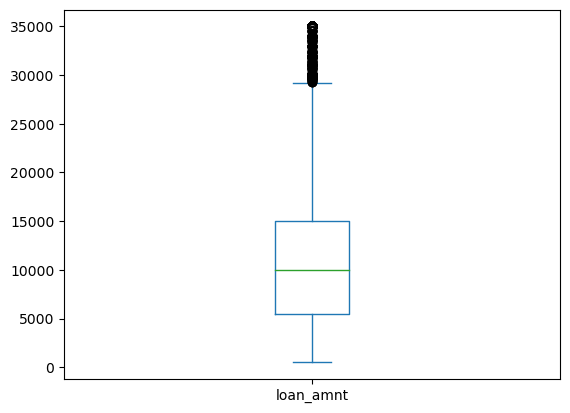

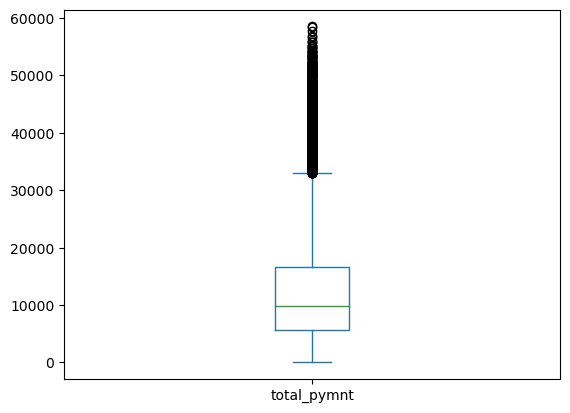

In [22]:
loanData = cleanedLoanData
loanData.loan_amnt.describe()

#box plot analysis for variables
loanData.loan_amnt.plot.box()
plt.show()
loanData.total_pymnt.plot.box()
plt.show()

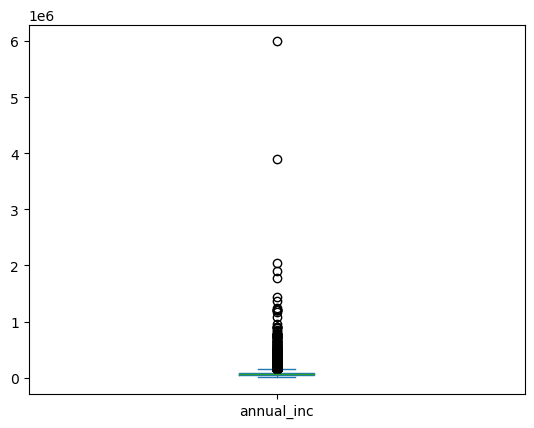

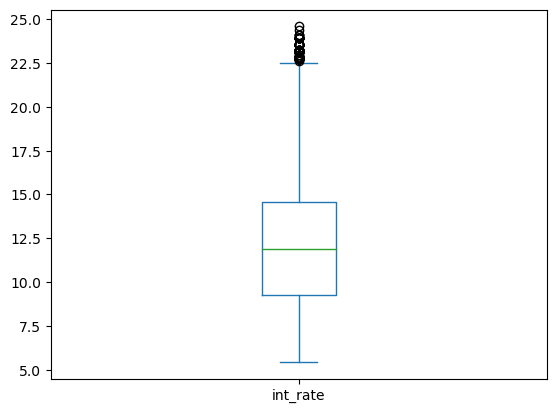

In [23]:
loanData.annual_inc.plot.box()
plt.show()
loanData.int_rate.plot.box()
plt.show()

## Removing Outliers for Annual_inc

In [24]:
loanData = loanData[loanData["annual_inc"] < loanData["annual_inc"].quantile(0.99)]

## Bivariate Analysis

(39319, 44)


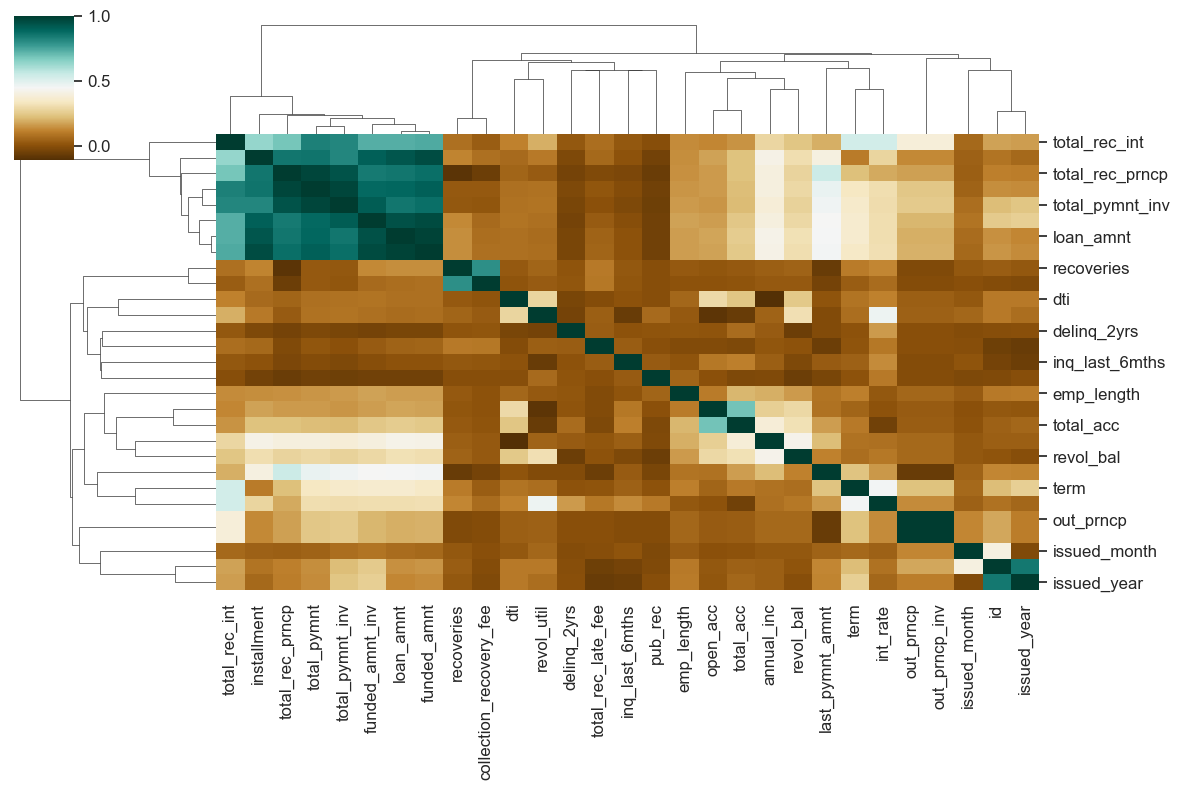

In [25]:
print(loanData.shape)
loanCorr = loanData.corr()
sns.set(font_scale=1.1)
sns.clustermap(loanCorr,annot=False,figsize=(12, 8),cmap="BrBG")
plt.show()

In [26]:
#dropping unnecessary columns
unnecessaryColumn2 = ["application_type","initial_list_status","installment","pymnt_plan"]
loanData.drop(labels = unnecessaryColumn2, axis =1, inplace=True)

## Derive More columns for more analysis

In [27]:
# since the loan amount, annual income range is very high, dividing into ranges will be helpful for analysing further
loanData['loan_amnt_range'] = pd.cut(loanData['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loanData['annual_inc_range'] = pd.cut(loanData['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loanData['int_rate_range'] = pd.cut(loanData['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
loanData['dti_range'] = pd.cut(loanData['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])
loanData.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issued_year,issued_month,loan_amnt_range,annual_inc_range,int_rate_range,dti_range
0,1077501,5000,5000,4975.0,36,10.65,B,B2,10,RENT,...,Jan-15,171.62,May-16,0.0,2011,12,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60,15.27,C,C4,1,RENT,...,Apr-13,119.66,Sep-13,0.0,2011,12,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.0,36,15.96,C,C5,10,RENT,...,Jun-14,649.91,May-16,0.0,2011,12,0-7000,0-20000,12.5-16,05-10
3,1076863,10000,10000,10000.0,36,13.49,C,C1,10,RENT,...,Jan-15,357.48,Apr-16,0.0,2011,12,7000-14000,40000-60000,12.5-16,15-20
4,1075358,3000,3000,3000.0,60,12.69,B,B5,1,RENT,...,May-16,67.79,May-16,0.0,2011,12,0-7000,60000-80000,12.5-16,15-20


## Univariate Analysis - Amount variables

1. Loan amount

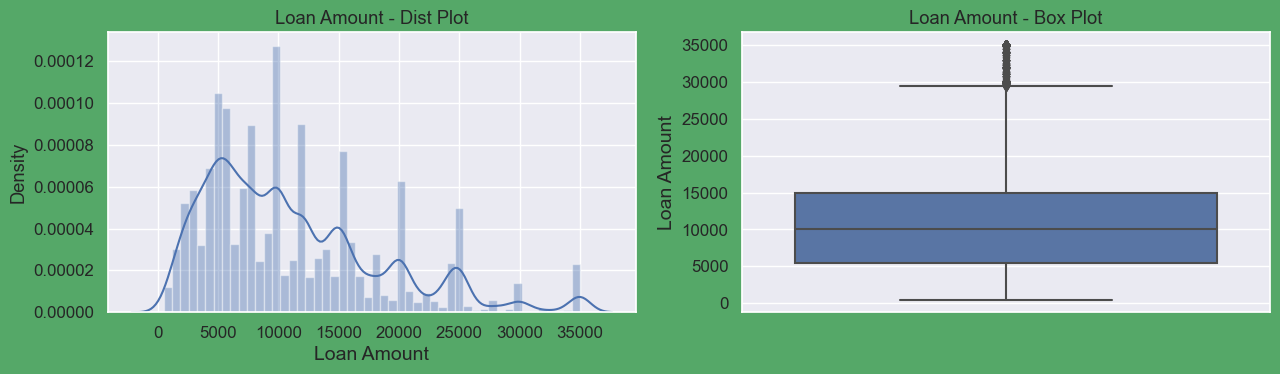

In [28]:
plt.figure(figsize=(15,8),facecolor='g')
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['loan_amnt'])
ax.set_title('Loan Amount - Dist Plot')
ax.set_xlabel('Loan Amount',fontsize=14)

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['loan_amnt'])
ax.set_title('Loan Amount - Box Plot')
ax.set_ylabel('Loan Amount',fontsize=14)
plt.show()

Major part of the loan amount value is between 5000 and 15000

2. Annual Income

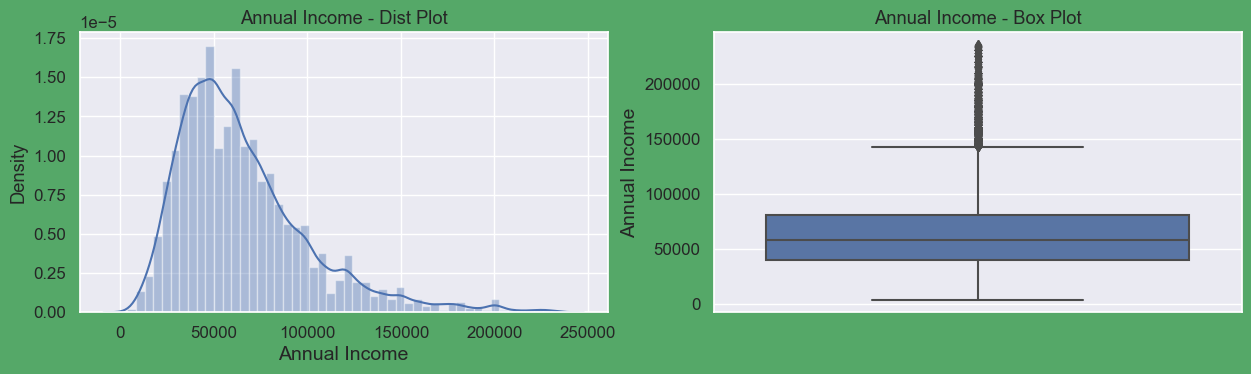

In [29]:
plt.figure(figsize=(15,8),facecolor='g')
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['annual_inc'])
ax.set_title('Annual Income - Dist Plot')
ax.set_xlabel('Annual Income',fontsize=14)

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['annual_inc'])
ax.set_title('Annual Income - Box Plot')
ax.set_ylabel('Annual Income',fontsize=14)
plt.show()

Major part of the Anual income  is between 5000 and below 100000

3. Interest Rate

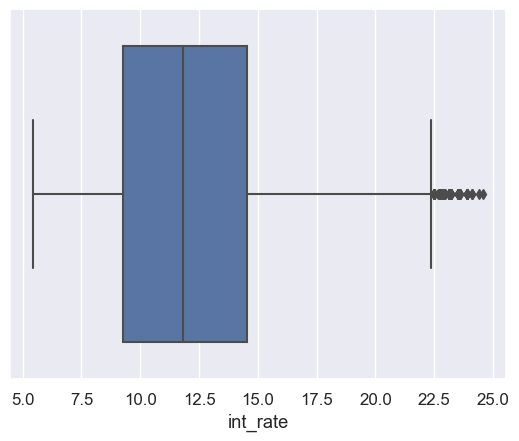

In [30]:
sns.boxplot(loanData["int_rate"])
plt.show()

## Univariate Analysis - Unordered Categorical Variable

1. Loan status

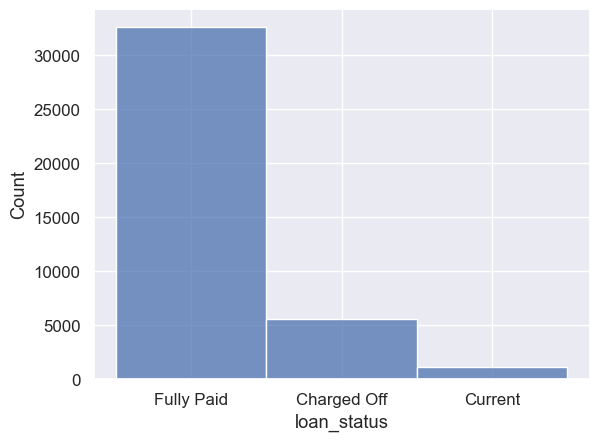

In [31]:
sns.histplot(data=loanData, x="loan_status")
plt.show()
allLoans = loanData[loanData["loan_status"] !="Current" ]
chargedOffLoans = loanData[loanData["loan_status"]=="Charged Off" ]
fullyPaidLoans = loanData[loanData["loan_status"]=="Fully Paid" ]

Here most ofthem are fully paid

2. Loan Purpose

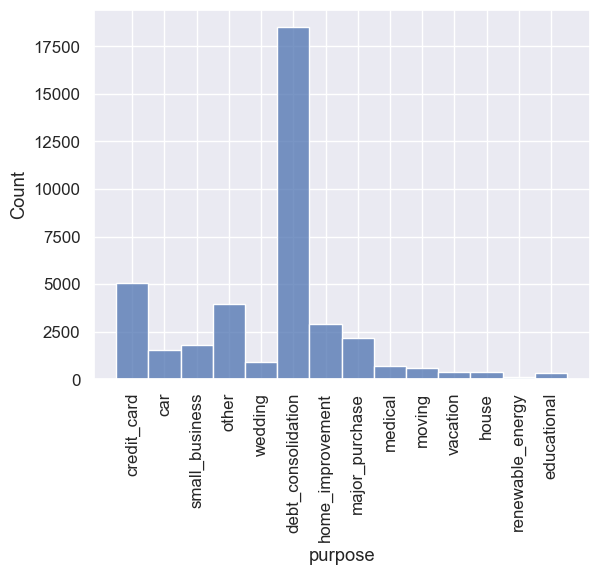

In [32]:
sns.histplot(data=loanData, x="purpose")
plt.xticks(rotation=90)
plt.show()

Major part of the purpose is for debt consolidation

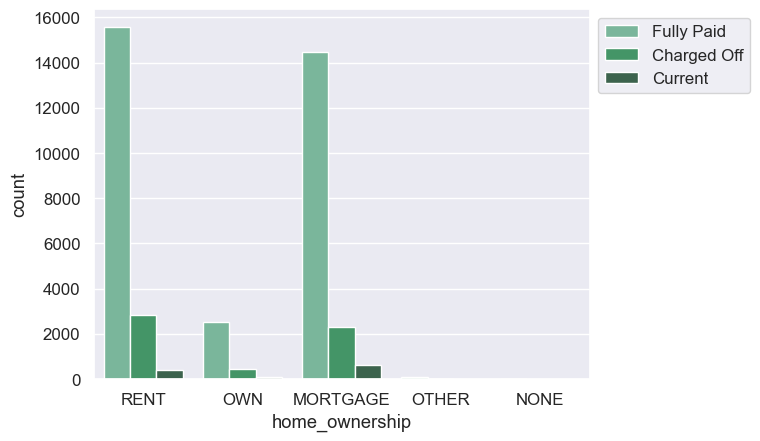

In [33]:
ax = sns.countplot(x="home_ownership",data=loanData,hue='loan_status',palette='BuGn_d')
ax.legend(bbox_to_anchor=(1, 1))


Most of the applicants are rented home 


In [34]:
loanData.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issued_year', 'issued_month',
       'loan_amnt_range', 'annual_inc_range', 'int_rate_range', 'dti_range'],
      dtype='object')

## Univariate Analysis - Ordered Categorical Variable

1.Loan Issue Year Analysis

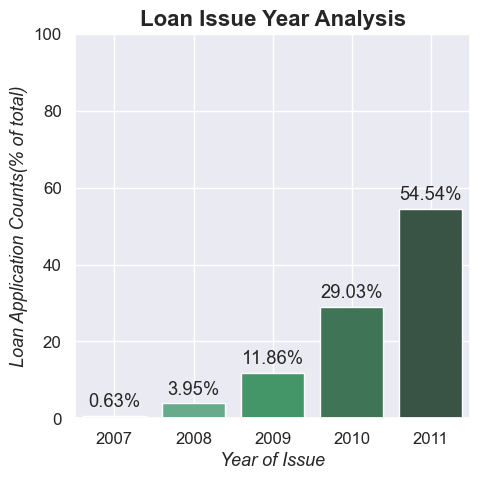

In [35]:
##Lets check the total number of approved applications by year

#sns.set(style='white')
plt.figure(figsize=(5,5), dpi=100)
br = pd.DataFrame(loanData.issued_year.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'issued_year':'issue_d_year_count'})
ax = sns.barplot(x='index',y='issue_d_year_count', data=br, palette='BuGn_d')

plt.xlabel('Year of Issue', fontsize= 13, fontstyle='italic')
plt.ylabel('Loan Application Counts(% of total)', fontsize= 13, fontstyle='italic')
plt.title('Loan Issue Year Analysis', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylim(0,100)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
plt.grid(True)
plt.tight_layout()
plt.show()


Loan applicants increases as years from 2007 to 2011 ,in 2011 the applicants ratio is 54.54%

2.Loan Issue month Analysis

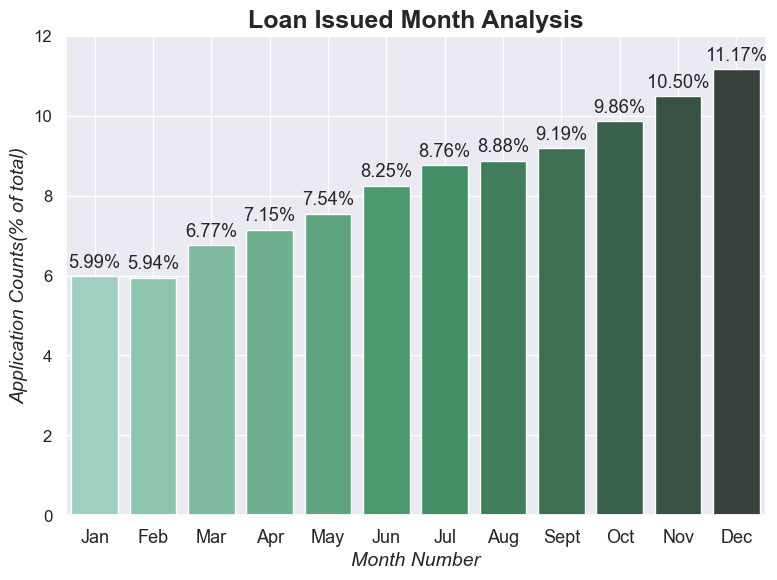

In [36]:
#sns.set(style='white')
plt.figure(figsize=(8,6), dpi=100)
br = pd.DataFrame(loanData.issued_month.value_counts(normalize = True).mul(100).sort_values())
br.reset_index(inplace=True)
br = br.rename(columns= {'issued_month':'issue_d_month_count'})
ax = sns.barplot(x='index',y='issue_d_month_count', data=br, palette='BuGn_d')

plt.xlabel('Month Number', fontsize= 14, fontstyle='italic')
plt.ylabel('Application Counts(% of total)' , fontsize= 14, fontstyle='italic')
plt.ylim(0,12)
plt.title('Loan Issued Month Analysis', fontsize=18,fontweight='bold')

   

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2.\
                                                    , p.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',\
                       'Sept','Oct','Nov','Dec'], fontsize=13)    
plt.grid(True)
plt.tight_layout()
plt.show()

Loan application count is higher in months of November and December


<bound method Axes.hist of <AxesSubplot:xlabel='issued_year,issued_month'>>

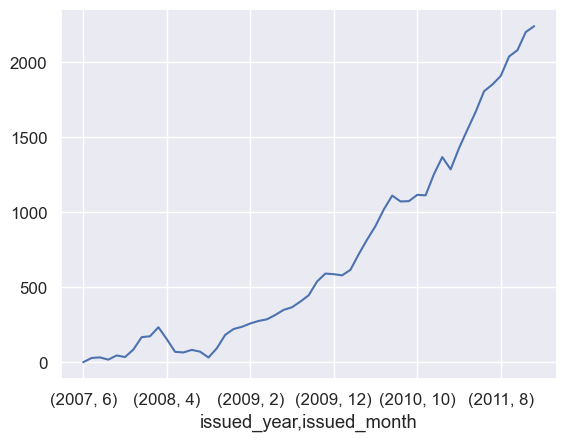

In [37]:
loanData.groupby(['issued_year','issued_month']).id.count().plot().hist


This is bivariate analysis between year and month it increases from (less year,month) to (end year month)

## Bivariate Analysis on annual income

1. Income range and ChargedOff Loans

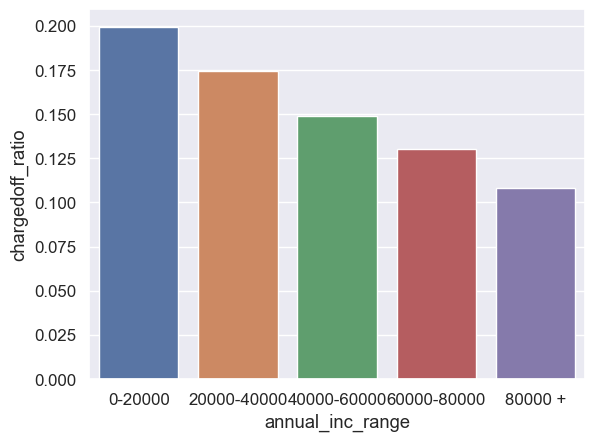

In [38]:
#calculating charged off ratio with repect to annual income range
incRangeVSLoan = loanData.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
incRangeVSLoan['Total'] = incRangeVSLoan['Charged Off'] + incRangeVSLoan['Current'] + incRangeVSLoan['Fully Paid'] 
incRangeVSLoan['chargedoff_ratio'] = incRangeVSLoan['Charged Off'] / incRangeVSLoan['Total']
sns.barplot(x='annual_inc_range', y='chargedoff_ratio', data=incRangeVSLoan)
plt.show()

Charged off ratio is higher in range between 0-20000

2. Loan purpose and charged off loans

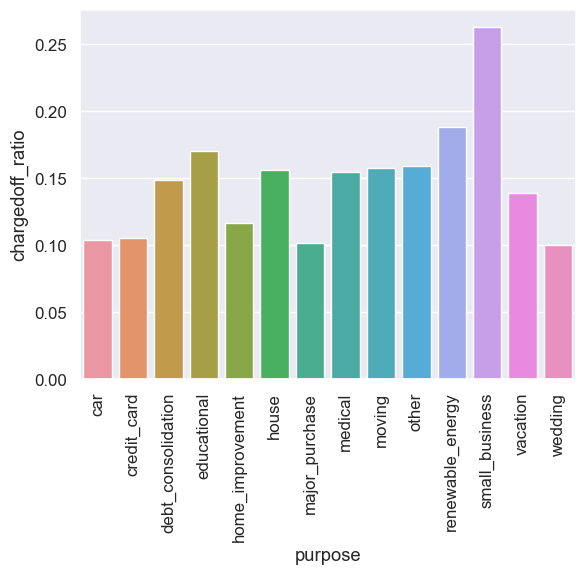

In [39]:
#calculating charged off ratio with repect to Loan  purpose 
purposeVSLoan = loanData.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purposeVSLoan['Total'] = purposeVSLoan['Charged Off'] + purposeVSLoan['Current'] + purposeVSLoan['Fully Paid'] 
purposeVSLoan['chargedoff_ratio'] = purposeVSLoan['Charged Off'] / purposeVSLoan['Total']
sns.barplot(x='purpose', y='chargedoff_ratio', data=purposeVSLoan)
plt.xticks(rotation=90)
plt.show()

Charged off ratio or defaulted is more in small business purpose

3. Interest rate and charged off loans

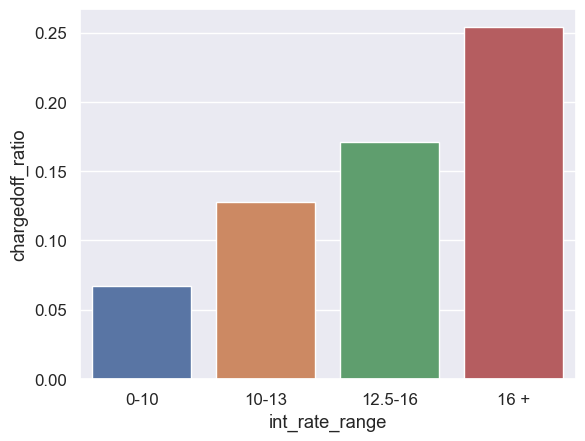

In [40]:
#calculating charged off ratio with repect to Loan intrest rate.
intRateVSLoan = loanData.groupby(['int_rate_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intRateVSLoan['Total'] = intRateVSLoan['Charged Off'] + intRateVSLoan['Current'] + intRateVSLoan['Fully Paid'] 
intRateVSLoan['chargedoff_ratio'] = intRateVSLoan['Charged Off'] / intRateVSLoan['Total']
sns.barplot(x='int_rate_range', y='chargedoff_ratio', data=intRateVSLoan)
plt.show()


Charged off ratio is higher in higher in higher intrest rates

4. Term and Interest Rate

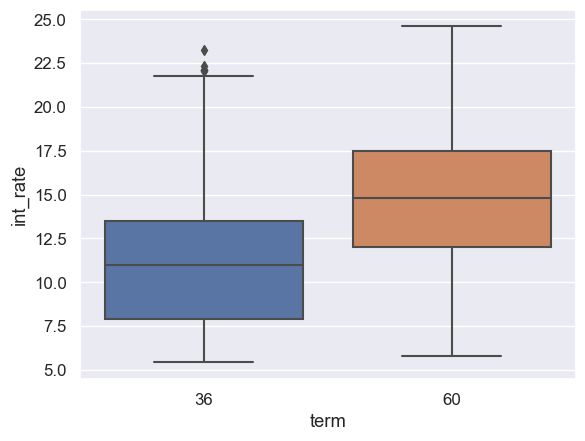

In [41]:
#boxplot to analyse interest rate with loan terms  on 36 months and 60 months
sns.boxplot(y='int_rate', x='term', data =loanData)
plt.show()

5. Purpose and Interest rate

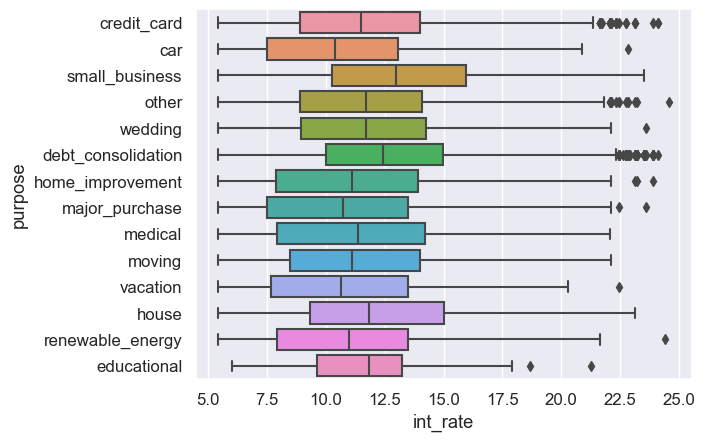

In [42]:
#box plot in all purposes with interest rates
sns.boxplot(x='int_rate', y='purpose', data =loanData)
plt.show()

6. employment length and charged off loans

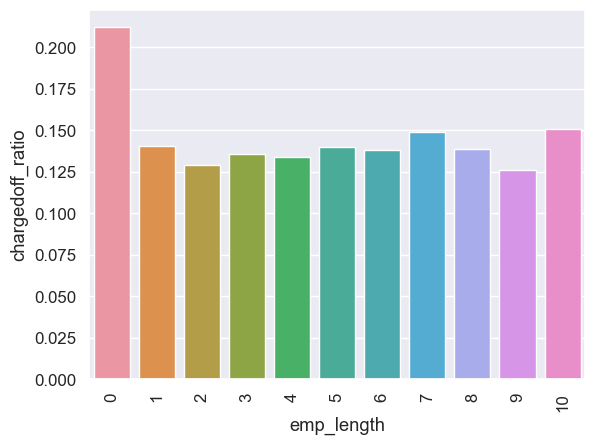

In [43]:
#calculating charged off ratio with repect to employee length.
empLenVSLoan = loanData.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
empLenVSLoan['Total'] = empLenVSLoan['Charged Off'] + empLenVSLoan['Current'] + empLenVSLoan['Fully Paid'] 
empLenVSLoan['chargedoff_ratio'] = empLenVSLoan['Charged Off'] / empLenVSLoan['Total']
sns.barplot(x='emp_length', y='chargedoff_ratio', data=empLenVSLoan)
plt.xticks(rotation=90)
plt.show()

Charged off ratio is higher in employee experience length 0

7. state and charged off loans

In [44]:
loanData['addr_state']

0        AZ
1        GA
2        IL
3        CA
4        OR
         ..
39712    CO
39713    NC
39714    MA
39715    MD
39716    MA
Name: addr_state, Length: 39319, dtype: object

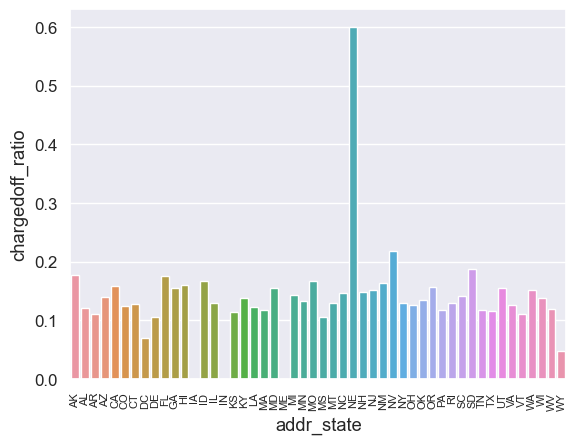

In [45]:
#calculating charged off ratio with repect to address states.
stateVSLoan = loanData.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
stateVSLoan['Total'] = stateVSLoan['Charged Off'] + stateVSLoan['Current'] + stateVSLoan['Fully Paid'] 
stateVSLoan['chargedoff_ratio'] = stateVSLoan['Charged Off'] / stateVSLoan['Total']
sns.barplot(x='addr_state', y='chargedoff_ratio', data=stateVSLoan)
plt.xticks(rotation=90, fontsize=8)
plt.show()


Charged off ratio is higher in state NE

8. Loan Amount and Interest rate

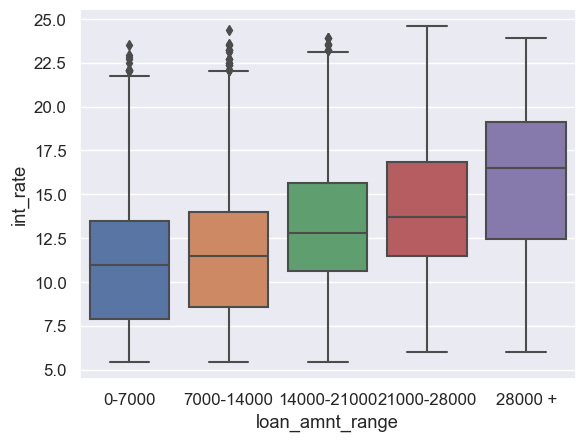

In [46]:
# boxplot and barplot between interest rate VS loan amount range.
sns.boxplot(y='int_rate', x='loan_amnt_range', data =loanData)
plt.show()


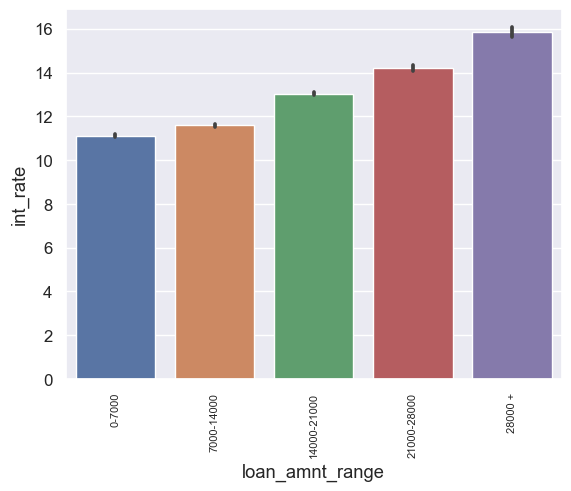

In [47]:

sns.barplot(x='loan_amnt_range', y='int_rate', data=loanData)
plt.xticks(rotation=90, fontsize=8)
plt.show()

9. Year and Interest Rate

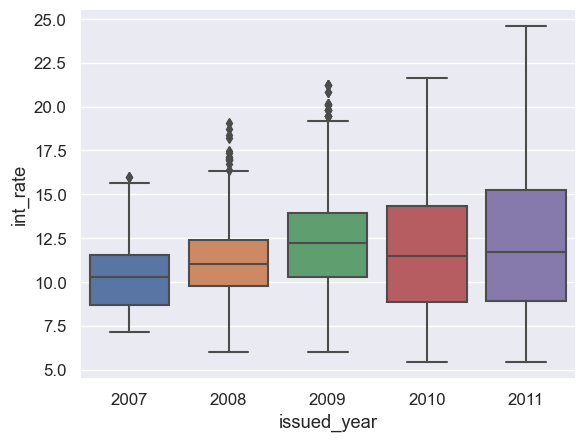

In [48]:
#boxplot and barplot between interest rate VS Issued year
sns.boxplot(y='int_rate', x='issued_year', data =loanData)
plt.show()

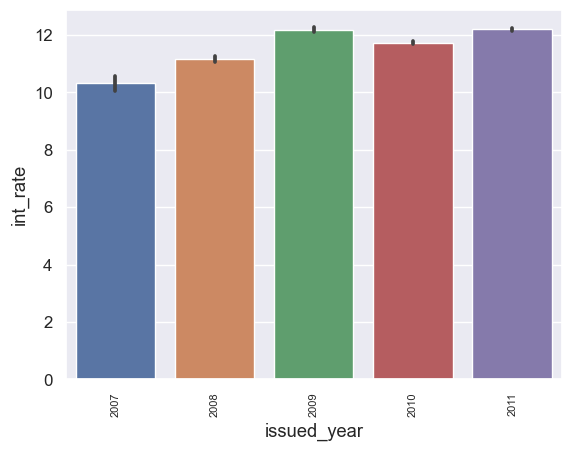

In [49]:
sns.barplot(x='issued_year', y='int_rate', data=loanData)
plt.xticks(rotation=90, fontsize=8)
plt.show()

## Multivariate Analysis

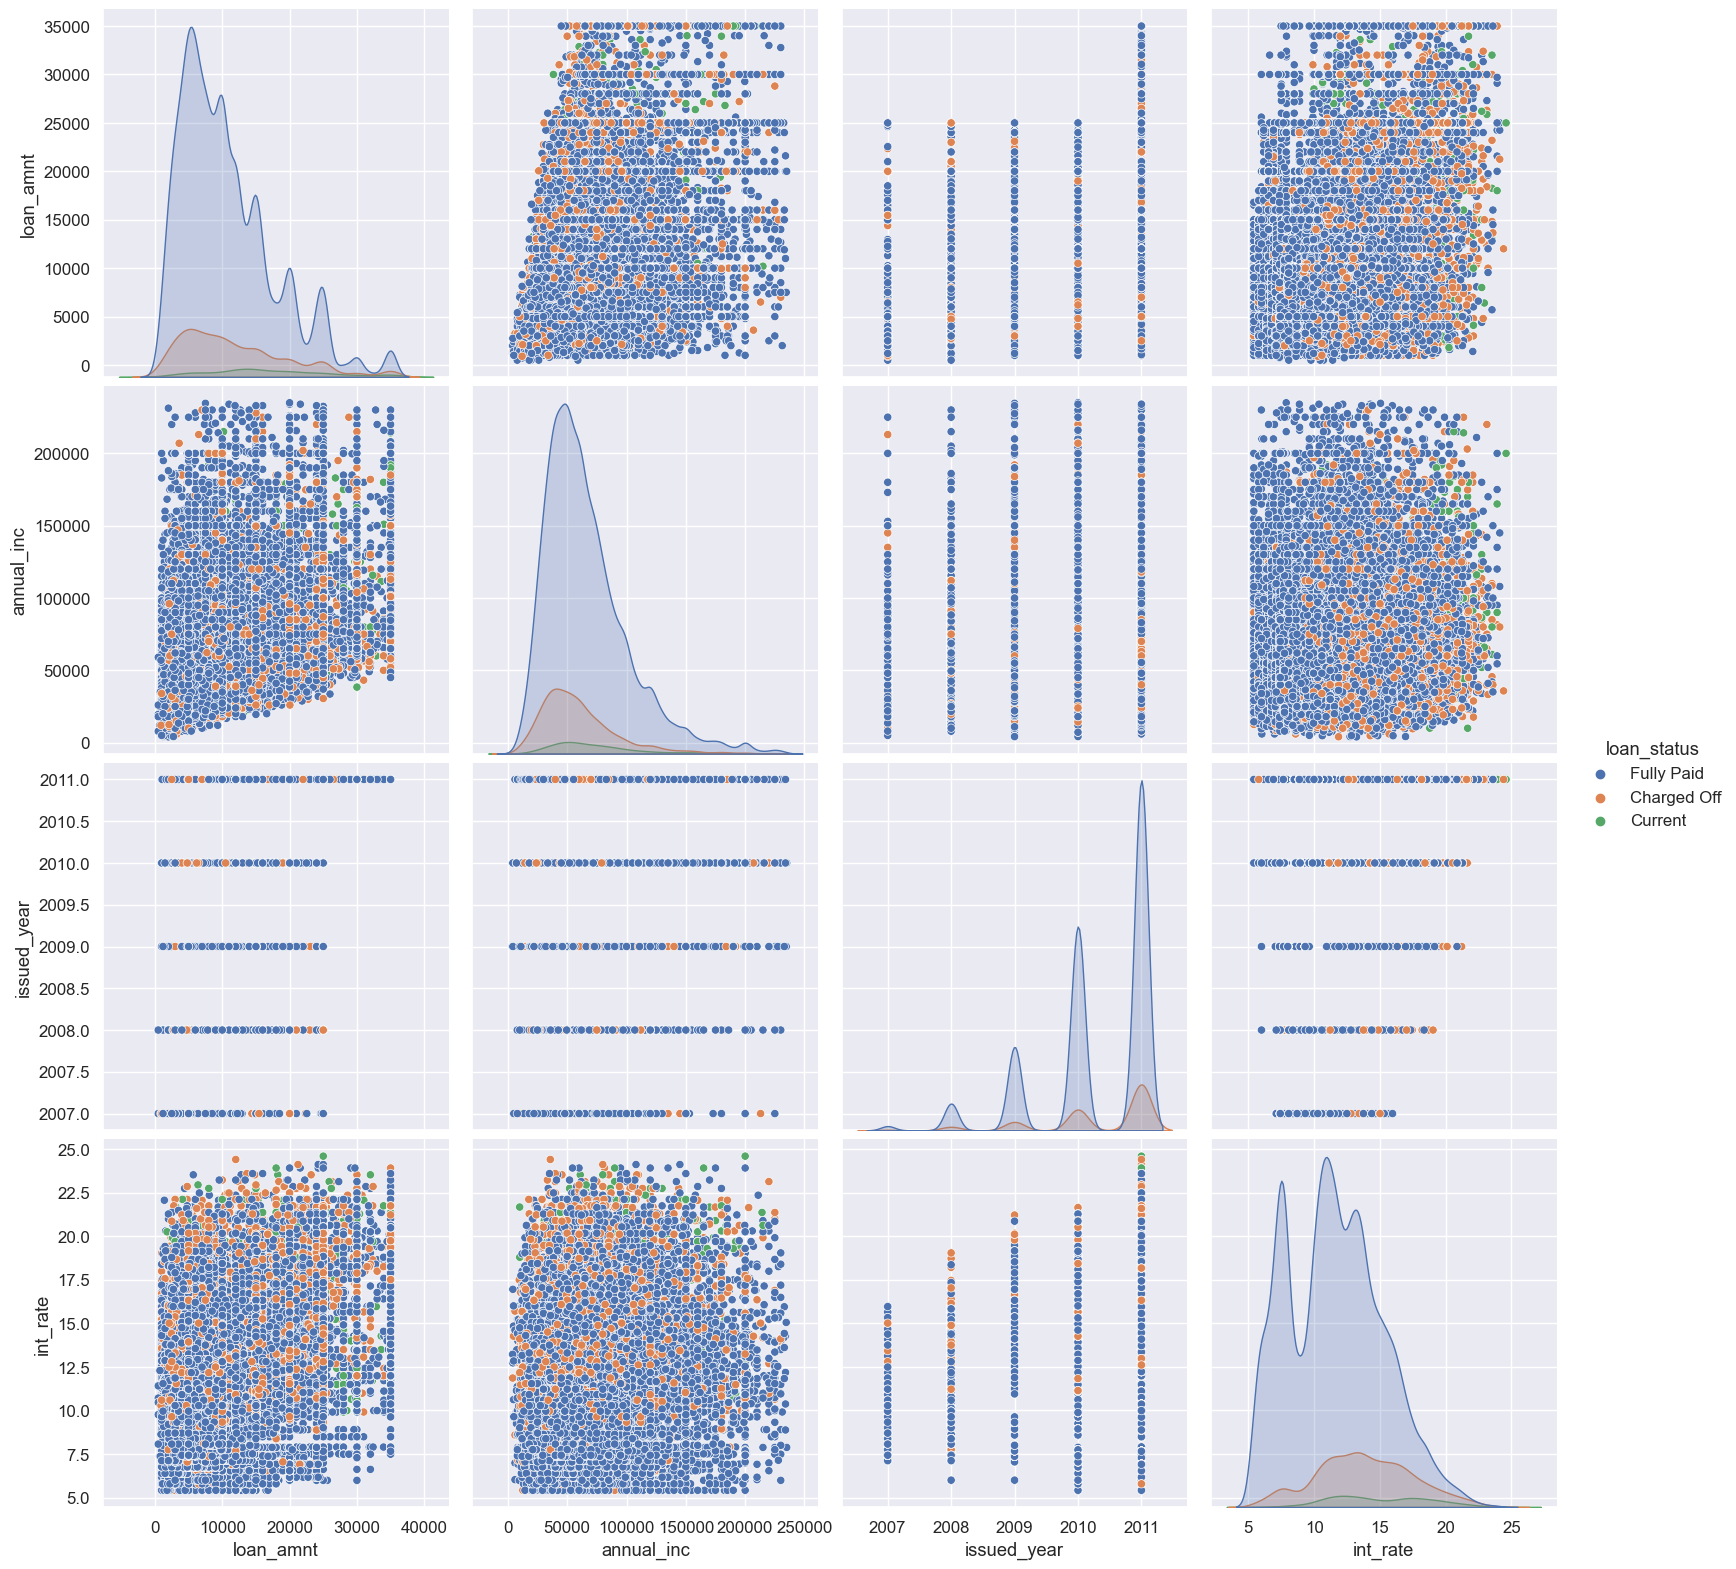

In [50]:
#Pairplot in variables loan amount ,annual income,issued year,interest rate with loan status (Fully paid, charged off,current)
pairPlotCols = ['loan_amnt','annual_inc', 'issued_year','int_rate','loan_status']
pairPlotTemp = loanData[pairPlotCols].copy()
pairPlotTemp.head()
sns.pairplot(pairPlotTemp, hue = 'loan_status',size = 4)
plt.show()

## Observations and Conclusion

▪ Annual Income :- Applicants from 'Low'(0-20K) and 'Medium'(40-60K) income group have a greater share of defaulted loans. 

▪ Employment Length : Maximum number of defaulters have experience 0 to 2 years of experience and 10/10+ years of . Hence, LC   should be take this aspect into consideration while lending loans. 

▪ Loan Purpose :- The top two reasons for loans are small business and renewable energy. Such applications should be carefully assessed.

▪ Address state:-Applicants from state NE has more defaulted or charged off Ratio.

▪ Interest Rate:-Charged off ratio increases with interest rate.
